In [1]:
import pandas as pd
import numpy as np

#Using pandas and numpy for data importing, text cleaning and data pre-processing
df_rev1 = pd.read_fwf('rotten-dataset-accuracy2.csv', encoding_errors='ignore')

#Naming the Columns
df_rev1.columns=['c'+str(i) for i in range(1, len(df_rev1.columns)+1)]

#Splitting the data set into its csv columns
df_new=df_rev1.c1.str.split(",", expand = True)

#Keeping only one column(data), while deleting the rest of the columns(empty)
df_rev2_new=pd.DataFrame()
df_rev2_new['c1']=pd.DataFrame(df_new[7])

#Checking for NaN data entries and removing them
df_rev2_new.isna().sum()
df_rev2_new=df_rev2_new.dropna()
df_rev2_new.isna().sum()


c1    0
dtype: int64

In [2]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
dfrev_final_without_sw=df_rev2_new
dfrev_final_without_sw['c1']=dfrev_final_without_sw['c1'].str.lower()
stop_words = stopwords.words('english')
#dfrev_final_without_sw=dfrev_final

#removing the stopwords
dfrev_final_without_sw['c1'] = df_rev2_new['c1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#removing the commonly repeating words
'''
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace(',','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('.','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('\'','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('"','')
#dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('good','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('film','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('movie','')
#dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('great','')
#dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('best','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('give','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('really','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('may','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('take','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('make','')
dfrev_final_without_sw['c1']= dfrev_final_without_sw['c1'].replace('  ',' ')
'''
#common_words = ['date', 'month', 'year', ' year', 'NA', 'department', '  ', 'film', 'make','good', 'feel', 'movie ', 'best', 'give', 'really', 'may', 'take', 'make ' 'made', 'movie', 'one' ,'even', 'little', 'performance', 'made', 'watching', 'picture', 'day','much', 'lot', 'never', 'go', 'look', 'filmmaker', '"']
#dfrev_final_without_sw['c1'] = dfrev_final_without_sw['c1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (common_words)]))

dfrev_final_without_sw

#Converting the columns without the stopwords to text
rev_text_final=' '.join(dfrev_final_without_sw['c1'].tolist())
rev_text_final

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mital\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'fantasy adventure fuses greek mythology contemporary american places values. anyone around 15 (give take couple years) thrill visual spectacle "uma thurman medusa "with top-notch cast dazzling special effects "whether audiences get behind lightning thief hard predict. overall "what\'s really lacking lightning thief genuine sense wonder list ingredients movie-magic potion enjoy start finish. harry potter knockoffs come transparent slapdash wannabe-franchise jumpstarter directed chris columbus. "percy jackson great movie "fun "crammed dragons "this action-packed fantasy adventure "for intended "chris columbus returns comfort zone mirthless best thing say chris columbus\'s adaptation he\'s incapable destroying whatever magic wonder books kept kids coming back more. cast simply generic. none young thespians stick out. "percy jackson may ""harry potter good "[p]erfectly inoffensive "admirably main thing movie seems missing classically trained british actors. "when movie slows catch breath 

In [3]:
dfrev_final_without_sw

,c1
0,fantasy adventure fuses greek mythology contem...
1,"""uma thurman medusa"
2,"""with top-notch cast dazzling special effects"
3,"""whether audiences get behind lightning thief ..."
4,"""what's really lacking lightning thief genuine..."
...,...
39995,
39996,"""the plot dialogue far less engaging [director..."
39997,amazing triumph proves master terrence malick ...
39998,words fail accurately describe challenging who...


In [4]:
#!pip uninstall vaderSentiment --yes   (incase of faulty installation)

#get_ipython().system('python -m pip install vaderSentiment --no-cache-dir')

#VADER (Valence Aware Dictionary and Sentiment Reasoner) is a rule-based sentiment analyzer
#It has been trained on social media text. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#creating object while polarity_score is a method that gives us the scores for pos, neg and neutral
sentiment = SentimentIntensityAnalyzer()
df_rev2_new=dfrev_final_without_sw
#creating 4 columns for different sentiments
df_rev2_new['sentiment_neg']=''
df_rev2_new['sentiment_pos']=''
df_rev2_new['sentiment_neu']=''
df_rev2_new['sentiment_compound']=''

#Creating final sentiment column
df_rev2_new['sentiment'] = ''


#Calculating the sentiment values and discerning the sentiment
count_row = df_rev2_new.shape[0]
for i in range(count_row):
  print(i,"  --  ",count_row)
  dic=sentiment.polarity_scores(df_rev2_new['c1'][i])
  value_neg = dic['neg']
  value_pos = dic['pos']
  value_neu = dic['neu']
  value_compound = dic['compound']
  df_rev2_new['sentiment_neg'][i]=value_neg
  df_rev2_new['sentiment_pos'][i]=value_pos
  df_rev2_new['sentiment_neu'][i]=value_neu
  df_rev2_new['sentiment_compound'][i]=value_compound
  if(df_rev2_new['sentiment_neg'][i] > df_rev2_new['sentiment_pos'][i]):
    df_rev2_new['sentiment'][i]='negative'
  elif(df_rev2_new['sentiment_pos'][i] > df_rev2_new['sentiment_neg'][i]):
    df_rev2_new['sentiment'][i]='positive'
  else:
    df_rev2_new['sentiment'][i]='neutral'

dfrev_final=df_rev2_new
dfrev_final

#Converting everything to lower case
dfrev_final['c1'] = dfrev_final['c1'].str.lower()
dfrev_final['c1'] = dfrev_final['c1'].replace(r'\s+', ' ', regex=True)

#Extracting csv file
dfrev_final.to_csv('Final_Rotten40000_2.0.csv')

0   --   40000
1   --   40000
2   --   40000
3   --   40000
4   --   40000
5   --   40000
6   --   40000
7   --   40000
8   --   40000
9   --   40000
10   --   40000
11   --   40000
12   --   40000
13   --   40000
14   --   40000
15   --   40000
16   --   40000
17   --   40000
18   --   40000
19   --   40000
20   --   40000
21   --   40000
22   --   40000
23   --   40000
24   --   40000
25   --   40000
26   --   40000
27   --   40000
28   --   40000
29   --   40000
30   --   40000
31   --   40000
32   --   40000
33   --   40000
34   --   40000
35   --   40000
36   --   40000
37   --   40000
38   --   40000
39   --   40000
40   --   40000
41   --   40000
42   --   40000
43   --   40000
44   --   40000
45   --   40000
46   --   40000
47   --   40000
48   --   40000
49   --   40000
50   --   40000
51   --   40000
52   --   40000
53   --   40000
54   --   40000
55   --   40000
56   --   40000
57   --   40000
58   --   40000
59   --   40000
60   --   40000
61   --   40000
62   --   40000
63

In [5]:
#Loading the Dataset
import pandas as pd

#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dfrev_final_without_sw['c1'])
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, dfrev_final_without_sw['sentiment'], test_size=0.25, random_state=5)
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",(accuracy_score)*100,"%")

Accuracuy Score:  80.16 %


In [6]:
rev_data_orig=pd.DataFrame(dfrev_final_without_sw[['c1','sentiment']])
rev_data_orig


,c1,sentiment
0,fantasy adventure fuses greek mythology contem...,positive
1,"""uma thurman medusa",neutral
2,"""with top-notch cast dazzling special effects",positive
3,"""whether audiences get behind lightning thief ...",negative
4,"""what's really lacking lightning thief genuine...",negative
...,...,...
39995,,neutral
39996,"""the plot dialogue far less engaging [director...",positive
39997,amazing triumph proves master terrence malick ...,positive
39998,words fail accurately describe challenging who...,negative


In [7]:
rev_data=rev_data_orig
rev_data['c1'] =   rev_data['c1'].str.replace('\d+', '')

C:\Users\mital\AppData\Local\Temp\ipykernel_16880\3845937822.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  rev_data['c1'] =   rev_data['c1'].str.replace('\d+', '')


In [8]:
rev_data

,c1,sentiment
0,fantasy adventure fuses greek mythology contem...,positive
1,"""uma thurman medusa",neutral
2,"""with top-notch cast dazzling special effects",positive
3,"""whether audiences get behind lightning thief ...",negative
4,"""what's really lacking lightning thief genuine...",negative
...,...,...
39995,,neutral
39996,"""the plot dialogue far less engaging [director...",positive
39997,amazing triumph proves master terrence malick ...,positive
39998,words fail accurately describe challenging who...,negative


In [9]:
'''
i=0
pun='?'
rev_data.loc[i, 'c1'] = rev_data.loc[i, 'c1'].replace(pun,'')

rev_data
'''

"\ni=0\npun='?'\nrev_data.loc[i, 'c1'] = rev_data.loc[i, 'c1'].replace(pun,'')\n\nrev_data\n"

In [10]:
filter_words=[",","'",'-','"','good','movies',"movie's","film's","movie","films","film","despite","makes","make","great","ones","done","one","best","enough","things","thing","without","something","well","every","better","first","two","bad","good","even","much","may","little","take","made","de","never"]
for ele in filter_words:
    rev_data['c1'] = rev_data['c1'].str.replace(ele, "")

In [11]:
print(rev_data.loc[0, 'c1'])

fantasy adventure fuses greek mythology contemporary american places values. any around  (give  couple years) thrill visual spectacle


In [12]:
def fun_cloud(dfrev_for_wc,options,output_file):
    rev_df= dfrev_for_wc[dfrev_for_wc['sentiment'].isin(options)]
    rev_text_final=pd.DataFrame(rev_df['c1'])
    rev_text_final.reset_index(drop=True,inplace=True)
    #print(rev_text_final.head())
    #print(rev_text_final.columns)
    # initializing punctuations string
    import string
    punc = string.punctuation

    # Removing punctuations in string
    # Using loop + punctuation string
    count_row = rev_text_final.shape[0]
  #  for index, row in rev_text_final.iterrows():
    for i in range(count_row):
        for ele in punc:
            rev_text_final.loc[i, 'c1'] = rev_text_final.loc[i, 'c1'].replace(ele,'')
            #print(i,"-",ele)
            #print(rev_text_final.loc[i, 'c1'])
            

    

    rev_text_final['c1'] = rev_text_final['c1'].str.replace('  ', ' ')

    filter_words=[",","'",'good','movies',"movie's","film's","movie","films","film","despite","makes","make","great","ones","done","one","best","enough","things","thing","without","something","well","every","better","first","two","bad","good","even","much","may","little","take","made","de","never"]
    for ele in filter_words:
        rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")

    rev_text_wc=rev_text_final['c1']
    rev_text_wc.to_csv(output_file)

    #C:/Users/mital/AppData/Local/Temp/ipykernel_16172/3402775723.py -m pip install wordcloud
    #!pip install wordcloud

    from wordcloud import WordCloud
    #Dimensions of word cloud
    wordcloud_rotten=WordCloud(background_color='white',width=512,height=360).generate(''.join(rev_text_wc))
    #Displaying the word cloud
    from matplotlib import pyplot as plt
    plt.imshow(wordcloud_rotten)
    plt.axis('off')
    wordcloud_name='WordCloud'+''.join(options)
    plt.savefig(wordcloud_name)
    plt.show()


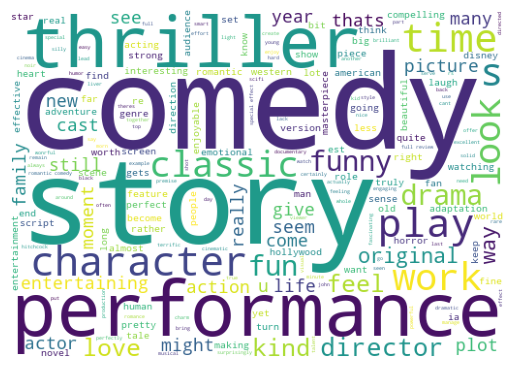

In [13]:
fun_cloud(rev_data,['positive'],'PositiveReviews.csv')


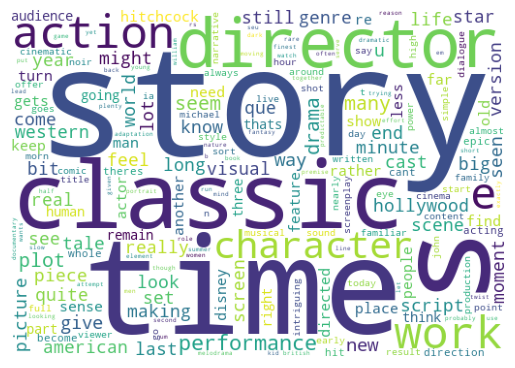

In [14]:
fun_cloud(rev_data,['neutral'],'NeutralReviews.csv')

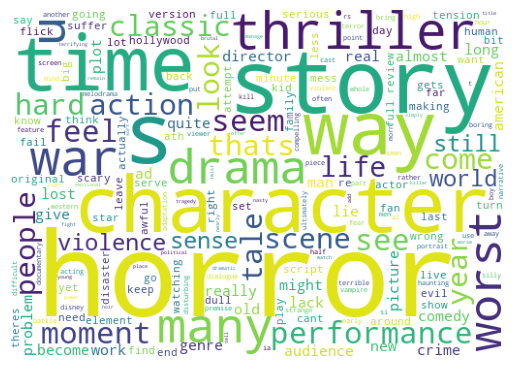

In [15]:
fun_cloud(rev_data,['negative'],'NegativeReviews.csv')

In [17]:
def fun_wordcount(dfrev_for_wc,options,outputfile):
    rev_df= dfrev_for_wc[dfrev_for_wc['sentiment'].isin(options)]
    rev_text_final=pd.DataFrame(rev_df['c1'])
    rev_text_final.reset_index(drop=True,inplace=True)
    
    rev_text_final.reset_index(drop=True,inplace=True)
    #print(rev_text_final.head())
    #print(rev_text_final.columns)
    # initializing punctuations string
    import string
    punc = string.punctuation

    # Removing punctuations in string
    # Using loop + punctuation string
    count_row = rev_text_final.shape[0]
  #  for index, row in rev_text_final.iterrows():
    for i in range(count_row):
        for ele in punc:
            rev_text_final.loc[i, 'c1'] = rev_text_final.loc[i, 'c1'].replace(ele,'')
    rev_text_final['c1'] = rev_text_final['c1'].str.replace(",", '')
    rev_text_final['c1'] = rev_text_final['c1'].str.replace("  ", ' ')

    filter_words=[",","'","likes","like","never","ever",'good','movies',"movie's","film's","movie","films","film","despite","makes","make","great","ones","done","one","best","enough","things","thing","without","something","well","every","better","first","two","bad","good","even","much","may","little","take","made","de","never"]
    for ele in filter_words:
        rev_text_final['c1'] = rev_text_final['c1'].str.replace(ele, "")

    rev_text_wc=rev_text_final['c1']
    rev_wordcount=rev_text_final.c1.str.split(expand=True).stack().value_counts()
    rev_wordcount.to_csv(outputfile)
    rev_wordcount


In [18]:
fun_wordcount(rev_data,['negative'],'NegativeWordCount.csv')

In [19]:
fun_wordcount(rev_data,['positive'],'PositiveWordCount.csv')